In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import rocks
rocks.set_log_level("error")
import time as t

import subprocess

# from astropy.time import Time
# import requests
# import io

# import astropy.units as u
# from astropy.coordinates import SkyCoord
# from astropy.coordinates import angular_separation

# from scipy.signal import argrelextrema


# from fink_utils.sso import spins as finkus
# import ssptools

In [2]:
# DAMIT
path_damit = '/astrodata/Catalog/DAMIT/damit20230418/'
path_spins = './'

# Read data

In [3]:
# Read DAMIT Tables
ssos = pd.read_csv(f'{path_damit}tables/asteroids.csv')
models = pd.read_csv(f'{path_damit}tables/asteroid_models.csv')
refs = pd.read_csv(f'{path_damit}tables/asteroid_models_references.csv')
bibs = pd.read_csv(f'{path_damit}tables/references.csv')

In [4]:
# Select columns for ASTEROIDS
ssos = ssos[ ['id', 'number', 'name', 'designation'] ]
ssos.columns = ['asteroid_id', 'number', 'name', 'designation']

In [5]:
# Select columns for MODELS
models = models[ [ 'id', 'asteroid_id', 'lambda', 'beta', 'period' ] ]
models.columns = [ 'model_id', 'asteroid_id', 'lambda', 'beta', 'period' ]

In [6]:
# Select columns for REFERENCES
refs = refs[ ['asteroid_model_id','reference_id'] ]
refs.columns = ['model_id','reference_id']

In [7]:
# Select columns for BIBLIOGRAPHY
bibs = bibs[ ['id', 'bibcode'] ]
bibs.columns = ['reference_id', 'bibcode']

In [8]:
# Merge everything
data = models.merge( ssos, on='asteroid_id')
data = data.merge( refs, on='model_id')
data = data.merge( bibs, on='reference_id')
data

,model_id,asteroid_id,lambda,beta,period,number,name,designation,reference_id,bibcode
0,101,101,35,-12,7.813230,2.0,Pallas,NaN,106,2003icar..164..346t
1,106,104,340,42,7.274471,6.0,Hebe,NaN,106,2003icar..164..346t
2,110,106,335,-5,12.866670,8.0,Flora,NaN,106,2003icar..164..346t
3,111,107,180,22,5.079176,9.0,Metis,NaN,106,2003icar..164..346t
4,117,111,98,57,7.443224,19.0,Fortuna,NaN,106,2003icar..164..346t
...,...,...,...,...,...,...,...,...,...,...
6230,6198,3569,104,-43,16.438100,949.0,Hel,NaN,662,2021a&a...654a..48h
6231,6199,3570,219,-46,9.606520,971.0,Alsatia,NaN,662,2021a&a...654a..48h
6232,6200,3570,85,-57,9.606580,971.0,Alsatia,NaN,662,2021a&a...654a..48h
6233,6201,3571,237,32,947.700000,988.0,Appella,NaN,662,2021a&a...654a..48h


In [9]:
data[ data.number==135 ]

,model_id,asteroid_id,lambda,beta,period,number,name,designation,reference_id,bibcode
13,162,142,272,52,8.4006,135.0,Hertha,NaN,106,2003icar..164..346t
93,1799,142,276,53,8.4006,135.0,Hertha,NaN,169,2017a&a...601a.114h
277,162,142,272,52,8.4006,135.0,Hertha,NaN,127,2009mpbu...36...98t


# Compute R

In [16]:
for i, r in data.iterrows():
    # print(i, r['number'], r['name'])
 
    f_shape = f"{path_damit}files/asteroid_{r['asteroid_id']}/model_{r['model_id']}/shape.txt"
    result = subprocess.run(['shape_R.sh',f_shape], stdout=subprocess.PIPE)
    Rs = result.stdout.decode('utf-8').split()
    
    data.loc[i,'R'] = float(Rs[0])
    data.loc[i,'R2'] = float(Rs[1])

In [17]:
data.to_csv( './data/damit.csv', index=False)

# Plot!

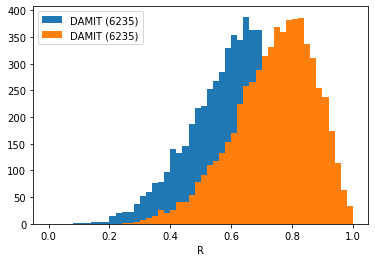

In [19]:
fig, ax = plt.subplots()

r = [0,1]
b = 50
ax.hist( data.R, range=r, bins=b, label=f'DAMIT ({len(data)})' )
ax.hist( data.R2, range=r, bins=b, label=f'DAMIT ({len(data)})' )
ax.set_xlabel('R')
ax.legend(loc='upper left')

In [36]:
data.bibcode.value_counts().head(50)

2018a&a...617a..57d    1204
2016a&a...587a..48d     491
2016a&a...586a.108h     433
2021a&a...654a..48h     273
2013a&a...551a..67h     247
2011a&a...530a.134h     164
2013a&a...559a.134h      58
2018icar..299...84h      57
2013icar..226.1045h      52
2011icar..214..652d      51
2017a&a...601a.114h      41
2009a&a...493..291a      34
2018icar..304..101d      33
2003icar..164..346t      24
2019a&a...625a.139m      22
2017a&a...607a.117v      22
2021a&a...654a..56v      21
2002icar..159..369k      19
2019icar..333..429p      19
2003icar..162..285s      17
2012a&a...545a.131m      14
2007a&a...465..331d      12
2015icar..256..101h      12
2009p&ss...57..259d      10
2018a&a...610a...7m       9
2004icar..167..178k       8
2006icar..185...39m       7
2011a&a...529a.107m       7
2008mpbu...35..167w       6
2008a&a...478..559m       6
2007a&a...473..633m       6
2017a&a...598a..91v       5
2009a&a...498..313m       5
2012a&a...547a..10d       4
2018a&a...609a..86d       4
2006a&a...459..663m 

In [33]:
[str(a).upper() for a in data.bibcode.value_counts().head(20).index]

['2018A&A...617A..57D',
 '2016A&A...587A..48D',
 '2016A&A...586A.108H',
 '2021A&A...654A..48H',
 '2013A&A...551A..67H',
 '2011A&A...530A.134H',
 '2013A&A...559A.134H',
 '2018ICAR..299...84H',
 '2013ICAR..226.1045H',
 '2011ICAR..214..652D',
 '2017A&A...601A.114H',
 '2009A&A...493..291A',
 '2018ICAR..304..101D',
 '2003ICAR..164..346T',
 '2019A&A...625A.139M',
 '2017A&A...607A.117V',
 '2021A&A...654A..56V',
 '2002ICAR..159..369K',
 '2019ICAR..333..429P',
 '2003ICAR..162..285S']